####  This workbook uses python to produce exploratory visuals and answer questions. 
 - How many movies had at least some valid financial information (values > 0 for budget OR revenue)? 
 - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
 - What is the average revenue per certification category?
 - What is the average budget per certification category?


# Create Project

In [7]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple

In [9]:
 !pip install tqdm


## Load libraries

In [4]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.ticker as tkr


#import 
from tqdm.notebook import trange, tqdm
from tqdm.notebook import tqdm_notebook 

# settings
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
# function for third visual
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s


y_format = tkr.FuncFormatter(func)  # make formatter

## Load data and concat Data

### 2000 Data

In [13]:
df_2000 = pd.read_csv('API_Data/final_tmdb_data_2000.csv.gz')
df_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.00,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,"10,000,000.00","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,"62,127.00",en,The Fantasticks,...,0.00,86.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.00,5.50,22.00,NaN
2,tt0113092,0.00,NaN,NaN,0.00,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,"110,977.00",en,For the Cause,...,0.00,100.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.00,5.10,8.00,NaN
3,tt0116391,0.00,NaN,NaN,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,"442,869.00",hi,Gang,...,0.00,152.00,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.00,4.00,1.00,NaN
4,tt0118694,0.00,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...","150,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.00,cn,花樣年華,...,"14,204,632.00",99.00,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.00,8.11,"2,231.00",PG


In [11]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1243 non-null   object 
 1   adult                  1242 non-null   float64
 2   backdrop_path          692 non-null    object 
 3   belongs_to_collection  116 non-null    object 
 4   budget                 1242 non-null   float64
 5   genres                 1242 non-null   object 
 6   homepage               63 non-null     object 
 7   id                     1242 non-null   float64
 8   original_language      1242 non-null   object 
 9   original_title         1242 non-null   object 
 10  overview               1221 non-null   object 
 11  popularity             1242 non-null   float64
 12  poster_path            1121 non-null   object 
 13  production_companies   1242 non-null   object 
 14  production_countries   1242 non-null   object 
 15  rele

### 2001 Data

In [11]:
df_2001 = pd.read_csv('API_Data/final_tmdb_data_2001.csv.gz')
df_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.00,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,"48,000,000.00","[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,"11,232.00",en,Kate & Leopold,...,"76,019,048.00",118.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.00,6.33,"1,195.00",PG-13
2,tt0114447,0.00,NaN,NaN,0.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,"151,007.00",en,The Silent Force,...,0.00,90.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.00,5.00,3.00,NaN
3,tt0116916,0.00,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.00,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,"73,549.00",en,The Dark Mist,...,0.00,101.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.00,3.50,2.00,PG
4,tt0118589,0.00,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,"22,000,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,"10,696.00",en,Glitter,...,"5,271,666.00",104.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.00,4.50,125.00,PG-13


In [13]:
df_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1337 non-null   object 
 1   adult                  1336 non-null   float64
 2   backdrop_path          720 non-null    object 
 3   belongs_to_collection  92 non-null     object 
 4   budget                 1336 non-null   float64
 5   genres                 1336 non-null   object 
 6   homepage               108 non-null    object 
 7   id                     1336 non-null   float64
 8   original_language      1336 non-null   object 
 9   original_title         1336 non-null   object 
 10  overview               1308 non-null   object 
 11  popularity             1336 non-null   float64
 12  poster_path            1201 non-null   object 
 13  production_companies   1336 non-null   object 
 14  production_countries   1336 non-null   object 
 15  rele

### Combine the  years

In [14]:
#combine the two dataframes
combined_df = pd.concat([df_2000, df_2001], ignore_index=True, sort=False)

# saving a csv of concatenated df
combined_df.to_csv('Data/tmdb_results_combined_df.csv.gz', compression='gzip',
                   index=False)

In [15]:
#look at data
display(combined_df.head(), combined_df.info(), combined_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2580 non-null   object 
 1   adult                  2578 non-null   float64
 2   backdrop_path          1412 non-null   object 
 3   belongs_to_collection  208 non-null    object 
 4   budget                 2578 non-null   float64
 5   genres                 2578 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2578 non-null   float64
 8   original_language      2578 non-null   object 
 9   original_title         2578 non-null   object 
 10  overview               2529 non-null   object 
 11  popularity             2578 non-null   float64
 12  poster_path            2322 non-null   object 
 13  production_companies   2578 non-null   object 
 14  production_countries   2578 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.00,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,"10,000,000.00","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,"62,127.00",en,The Fantasticks,...,0.00,86.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.00,5.50,22.00,NaN
2,tt0113092,0.00,NaN,NaN,0.00,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,"110,977.00",en,For the Cause,...,0.00,100.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.00,5.10,8.00,NaN
3,tt0116391,0.00,NaN,NaN,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,"442,869.00",hi,Gang,...,0.00,152.00,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.00,4.00,1.00,NaN
4,tt0118694,0.00,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...","150,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.00,cn,花樣年華,...,"14,204,632.00",99.00,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.00,8.11,"2,231.00",PG


None

Index(['imdb_id', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'certification'],
      dtype='object')

# Visual #1:
- How many movies had at least some valid financial information (values > 0 for budget OR revenue)? Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

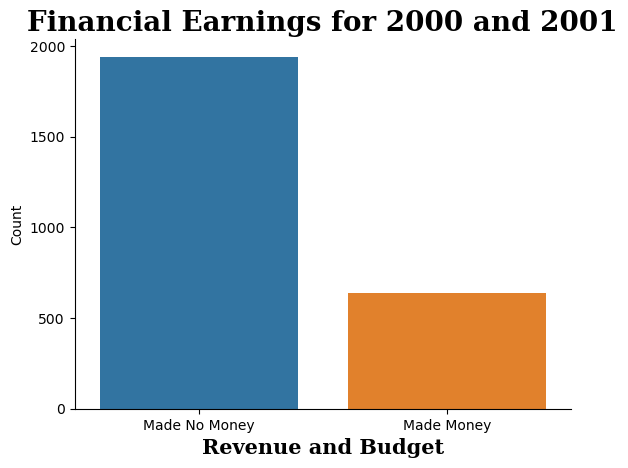

In [17]:
combined_monies = (combined_df["budget"]> 0) | (combined_df['revenue'] > 0)

plot=combined_df[combined_monies]

ax= sns.countplot(x=combined_monies)
ax.set_title('Financial Earnings for 2000 and 2001', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('xxx', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xlabel('Revenue and Budget')
ax.set_xticklabels(['Made No Money', 'Made Money'])
plt.ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#update params
plt.rcParams.update ({'font.family': 'serif', 'font.size':'15', 'font.weight':'bold'})

plt.savefig('Images/Financial Earnings_2000_2001', bbox_inches='tight')

In [15]:
# filtering for only movies with financial information present
finance = combined_df[(combined_df['budget'] > 0) & (combined_df['revenue'] > 0)].copy()
some_finance = combined_df[(combined_df['budget'] > 0) | (combined_df['revenue'] > 0)]

# confirming
display(combined_df.shape, some_finance.shape, finance.shape)

(2580, 26)

(639, 26)

(355, 26)

#### Of the 2580 entries in the original data (movies from years 2000 and 2001):

- 639 entries had *some* financial information in either budget or revenue columns
- 354 had financial information in both budget and revenue columns
- 1,921 made no money in either budget or revenue

# Visual #2
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?


In [35]:
#check the certification counts
combined_df['certification'].value_counts()

R          467
PG-13      182
NR          71
PG          63
G           25
NC-17        6
Unrated      1
Name: certification, dtype: int64

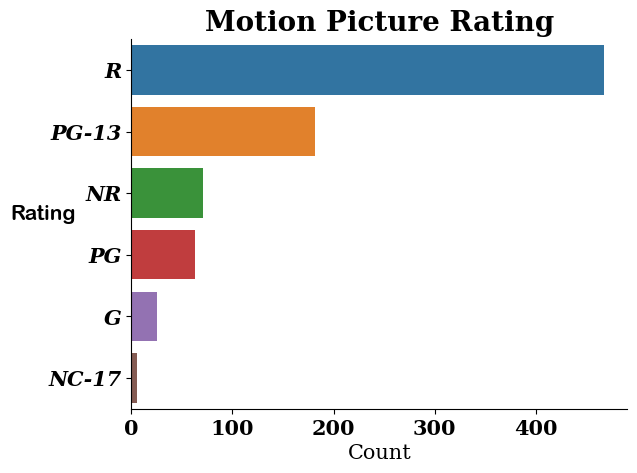

In [39]:
#create the countplot
ax= sns.countplot(data=combined_df, y='certification',
                  order = combined_df['certification'].value_counts().iloc[:6].index)
ax.set_title('Motion Picture Rating', fontfamily='serif',fontsize = 20, fontweight = 'bold');

plt.xlabel('Count')
plt.ylabel('Rating', fontfamily='Arial Rounded MT Bold', fontsize = 15, rotation = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(labels = ['R','PG-13', 'NR', 'PG', 'G', 'NC-17'], 
                   rotation=0, 
                   fontstyle='italic', 
                   color='black');
plt.savefig('Images/Motion_Picture_Rating_2000_2001', bbox_inches='tight')

# Visual #3


In [26]:
# grouping by rating and calculating aggregations
revenue = (finance
            .groupby('certification')
            .agg(avg_budget=('budget','mean'), avg_revenue=('revenue', 'mean'))
            .reset_index()
            .sort_values('avg_revenue', ascending=False)
        )
revenue

,certification,avg_budget,avg_revenue
0,G,"44,000,000.00","133,216,881.69"
2,PG,"51,974,907.80","129,125,593.40"
3,PG-13,"46,627,328.09","111,101,802.32"
4,R,"26,724,573.78","52,061,242.92"
1,NR,"13,528,571.43","22,122,566.43"


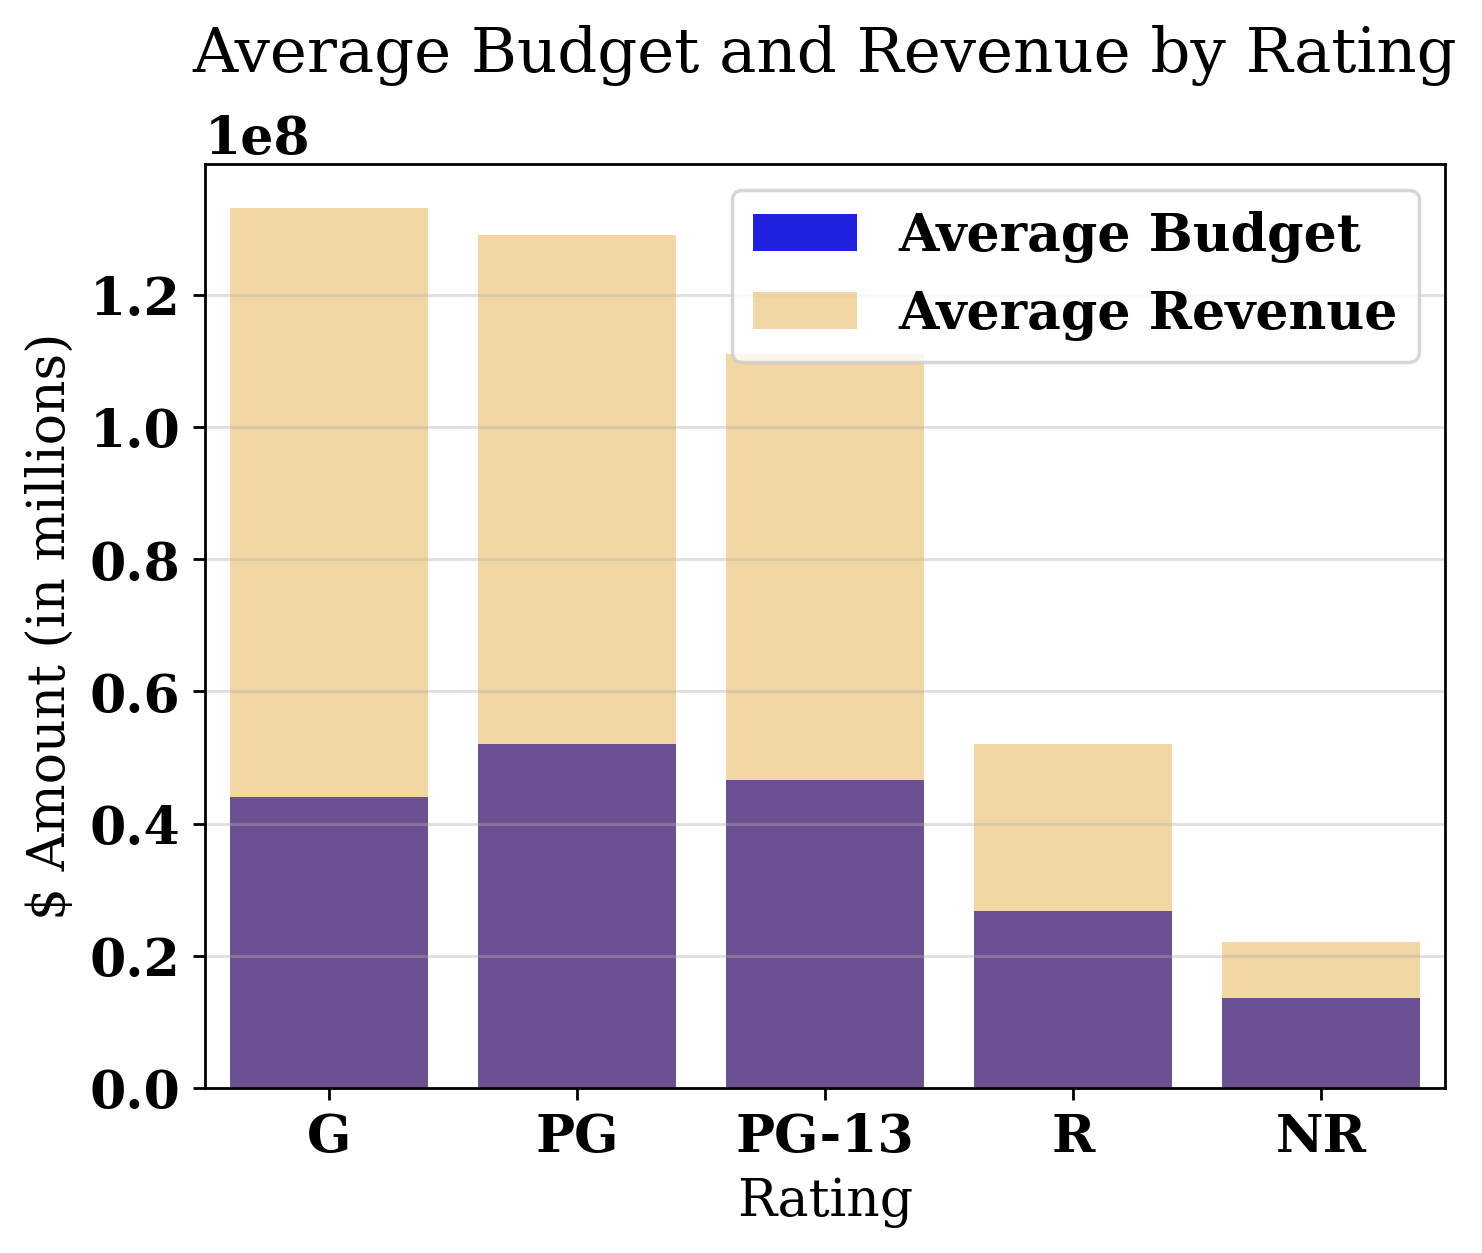

In [23]:
# plotting Budget and Revenue by Rating
plt.figure(dpi=250)
sns.barplot(data=revenue, x='certification', y='avg_budget', 
            color='blue', label='Average Budget')
sns.barplot(data=revenue, x='certification', y='avg_revenue', 
            color='orange', label='Average Revenue', alpha=.4)

# Setting plot title and axis labels
plt.title('Average Budget and Revenue by Rating', pad=12)
plt.xlabel('Rating')
plt.ylabel('$ Amount (in millions)')
plt.grid(axis='y', alpha=.4)
plt.legend();

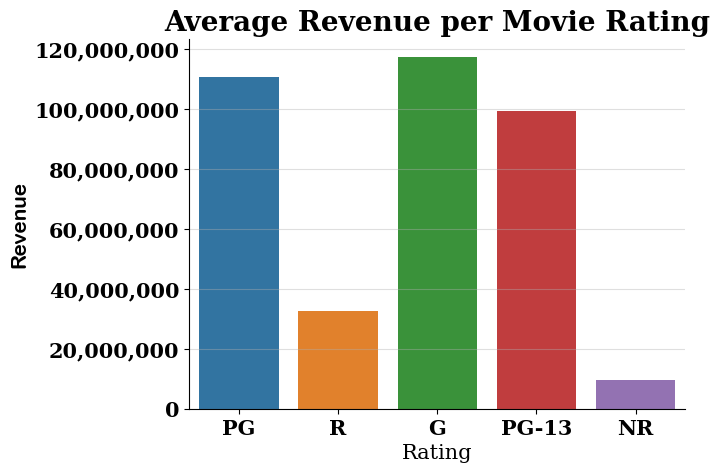

In [28]:
ax=sns.barplot(data=plot, x='certification', y= 'revenue', errorbar=None);
ax.set_title('Average Revenue per Movie Rating', fontfamily='serif',fontsize = 20, fontweight = 'bold');

plt.xlabel('Rating')
plt.ylabel('Revenue', fontfamily='Arial Rounded MT Bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')

ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xticklabels(labels = ['No rating','PG', 'R', 'G', 'PG-13','NR'], 
                   #rotation=45, 
                   #fontstyle='italic', 
                   #color='black');
            
           